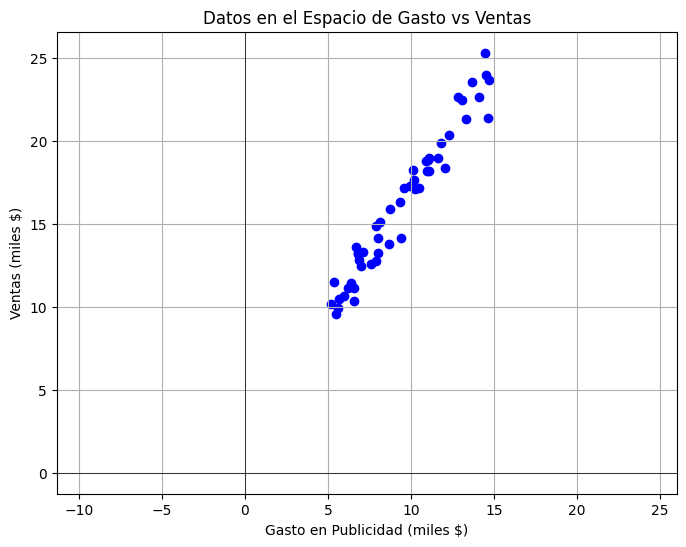

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Datos de ejemplo: Gasto en Publicidad vs Ventas
# Hay una fuerte correlación positiva
np.random.seed(42)
gasto = np.random.rand(50) * 10 + 5 # Gasto entre 5 y 15
ventas = gasto * 1.5 + np.random.randn(50) * 1 + 2 # Ventas correlacionadas con ruido

X = np.stack([gasto, ventas], axis=1)

# Visualizamos los datos originales en su espacio bidimensional
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Datos Originales')
plt.title('Datos en el Espacio de Gasto vs Ventas')
plt.xlabel('Gasto en Publicidad (miles $)')
plt.ylabel('Ventas (miles $)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.axis('equal')
plt.show()

In [3]:
# Inicializamos PCA para encontrar 1 componente principal
pca = PCA(n_components=1)

# Ajustamos el modelo a los datos.
# El método .fit() calcula la matriz de covarianza y los vectores propios.
pca.fit(X)

# Obtenemos los componentes principales (los nuevos ejes)
# Estos son los vectores propios
componente_principal_1 = pca.components_[0]

print(f"Vector del 1er Componente Principal: {componente_principal_1}")
print(f"Varianza explicada por el 1er Componente: {pca.explained_variance_ratio_[0]:.2f}")

# Proyectamos los datos originales en este nuevo subespacio de 1D
X_transformado = pca.transform(X)

# La transformación nos da los datos en el nuevo sistema de coordenadas
print("\nPrimeros 5 puntos transformados:")
print(X_transformado[:5])

Vector del 1er Componente Principal: [0.54840017 0.83621604]
Varianza explicada por el 1er Componente: 0.99

Primeros 5 puntos transformados:
[[-0.6668723 ]
 [ 9.24574263]
 [ 5.0628098 ]
 [ 2.50405842]
 [-6.46009331]]


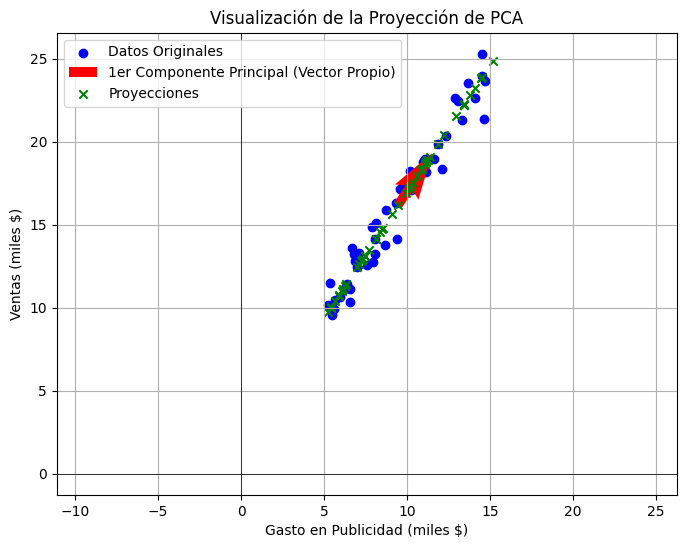

In [4]:
# Recreamos el gráfico original para superponer el subespacio
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Datos Originales')
plt.title('Visualización de la Proyección de PCA')
plt.xlabel('Gasto en Publicidad (miles $)')
plt.ylabel('Ventas (miles $)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.axis('equal')

# Dibujamos el vector del primer componente principal
plt.quiver(X[:, 0].mean(), X[:, 1].mean(), # Punto de inicio en el centro de los datos
           componente_principal_1[0], componente_principal_1[1],
           scale=10, color='red', width=0.015,
           label='1er Componente Principal (Vector Propio)')

# Dibujamos la proyección de los datos sobre este nuevo subespacio
proyecciones = pca.inverse_transform(X_transformado)
plt.scatter(proyecciones[:, 0], proyecciones[:, 1], c='green', marker='x', label='Proyecciones')

plt.legend()
plt.show()